# Assignment 6, Part 1: WeatherPy

## Dependencies

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

## Generate the cities list

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


## Retrieve weather data from the cities list generated

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'metric'

params = {
    'appid': weather_api_key,
    'units': units
}

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    
    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Build query URL
    params['q'] = city
    response = requests.get(url, params=params).json()

    try:
        # Parse the JSON and retrieve data
        city_weather = response['weather']

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response['coord']['lat']
        city_lng = response['coord']['lon']
        city_max_temp = response['main']['temp_max']
        city_humidity = response['main']['humidity']
        city_clouds = response['clouds']['all']
        city_wind = response['wind']['speed']
        city_country = response['sys']['country']
        city_date = response['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mata-utu
Processing Record 2 of Set 1 | egilsstadir
Processing Record 3 of Set 1 | grand-lahou
Processing Record 4 of Set 1 | ermoupolis
Processing Record 5 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 6 of Set 1 | hamilton
Processing Record 7 of Set 1 | puerto natales
Processing Record 8 of Set 1 | grytviken
Processing Record 9 of Set 1 | al fujairah city
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | cargados carajos
City not found. Skipping...
Processing Record 12 of Set 1 | onega
Processing Record 13 of Set 1 | inari
Processing Record 14 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 15 of Set 1 | lev tolstoy
Processing Record 16 of Set 1 | pakruojis
Processing Record 17 of Set 1 | mil'kovo
Processing Record 18 of Set 1 | olonkinbyen
Processing Record 19 of Set 1 | fouesnant
Processing Record 20 of Set 1 | queenstown
Pro

## Save data in pandas DataFrame

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          578
Lat           578
Lng           578
Max Temp      578
Humidity      578
Cloudiness    578
Wind Speed    578
Country       578
Date          578
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mata-utu,-13.2816,-176.1745,26.68,75,100,6.99,WF,1690336933
1,egilsstadir,65.2653,-14.3948,6.18,91,100,2.01,IS,1690336933
2,grand-lahou,5.1367,-5.0242,24.04,92,98,2.96,CI,1690336933
3,ermoupolis,37.4423,24.9425,28.76,61,0,1.03,GR,1690336933
4,hamilton,39.1834,-84.5333,26.10,72,73,1.37,US,1690336711


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

## Retrieve data from CSV file

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Rename the columns
city_data_df = city_data_df.rename(columns={'Lat': 'Latitude',
                                            'Lng': 'Longitude',
                                            'Max Temp': 'Max Temperature (C)',
                                            'Humidity': 'Humidity (%)',
                                            'Cloudiness': 'Cloudiness (%)',
                                            'Wind Speed': 'Wind Speed (m/s)'})

# Display sample data
city_data_df.head()

,City,Latitude,Longitude,Max Temperature (C),Humidity (%),Cloudiness (%),Wind Speed (m/s),Country,Date
City_ID,,,,,,,,,
0,mata-utu,-13.2816,-176.1745,26.68,75,100,6.99,WF,1690336933
1,egilsstadir,65.2653,-14.3948,6.18,91,100,2.01,IS,1690336933
2,grand-lahou,5.1367,-5.0242,24.04,92,98,2.96,CI,1690336933
3,ermoupolis,37.4423,24.9425,28.76,61,0,1.03,GR,1690336933
4,hamilton,39.1834,-84.5333,26.10,72,73,1.37,US,1690336711


## Scatter plots

### Function to create and save scatter plot
- Input 1: name of the column to be plotted against the latitude
- Input 2: a name to be given to the figure when it is saved
- Input 3: 'True' to save the figure as a PNG, 'False' (default) to only display it in the notebook

In [8]:
def scatter_plot(y_param, figname, savefig=False):
    # Use DataFrame generated
    global city_data_df

    # The X-axis will always show the lattitude
    x_param = 'Latitude'

    # Prepare scatter plot from DataFrame
    title = f"City Latitude vs. {y_param}"
    city_data_df.plot.scatter(x_param, y_param, grid=True, title=title)

    # Save figure as PNG
    if savefig:
        plt.savefig(f"output_data/{figname}.png")

    # Show chart
    plt.show()

### Display and save scatter plots
This section make use of the scatter_plot() function defined above for efficiency.

Fig1: Latitude vs Max Temperature (C)


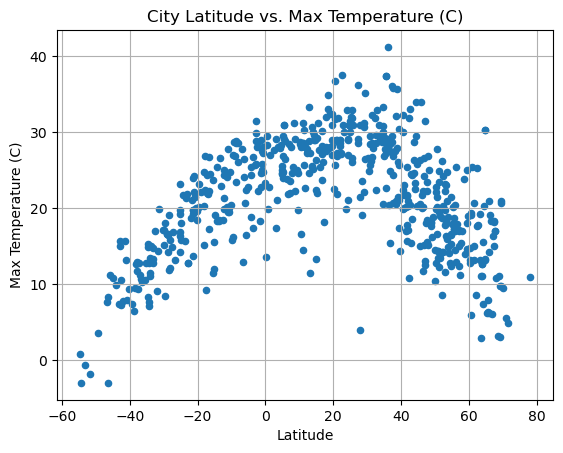

Fig2: Latitude vs Humidity (%)


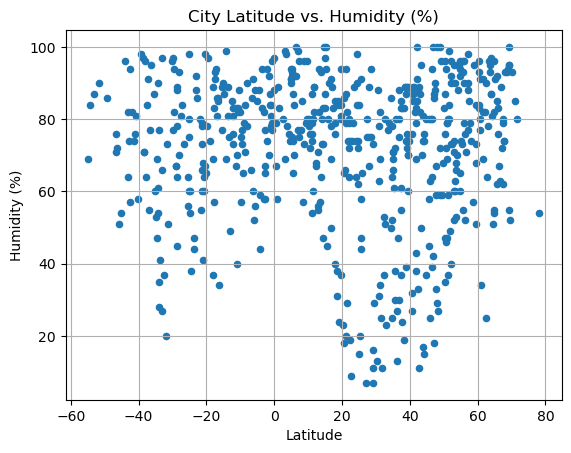

Fig3: Latitude vs Cloudiness (%)


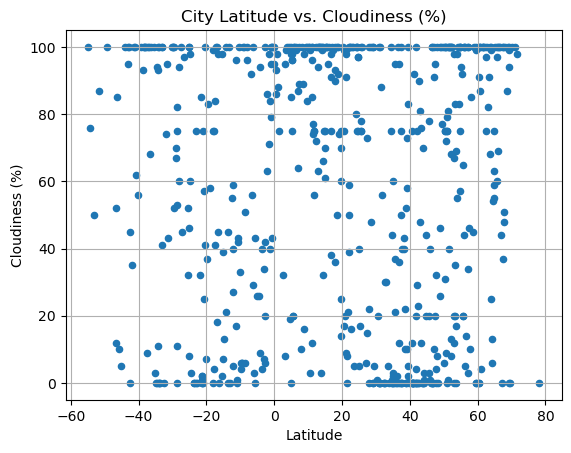

Fig4: Latitude vs Wind Speed (m/s)


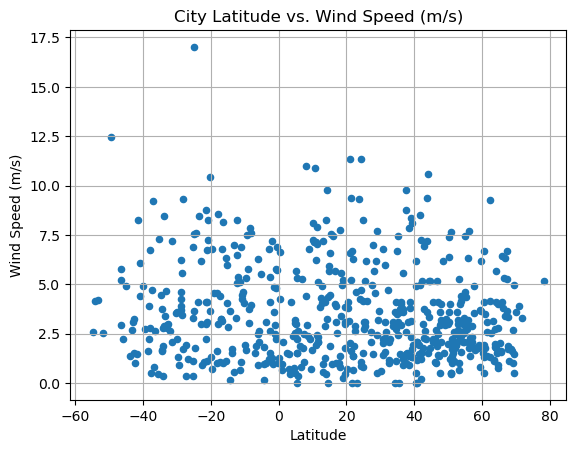

In [9]:
y_params = ['Max Temperature (C)', 'Humidity (%)', 'Cloudiness (%)', 'Wind Speed (m/s)']

for i, y_param in enumerate(y_params):
    figname = f"Fig{i+1}"
    print(f"{figname}: Latitude vs {y_param}")
    scatter_plot(y_param, figname, True)

## Linear regression models

### Northern hemisphere DataFrame

In [10]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Latitude']>=0,:]

# Display sample data
northern_hemi_df.head()

,City,Latitude,Longitude,Max Temperature (C),Humidity (%),Cloudiness (%),Wind Speed (m/s),Country,Date
City_ID,,,,,,,,,
1,egilsstadir,65.2653,-14.3948,6.18,91,100,2.01,IS,1690336933
2,grand-lahou,5.1367,-5.0242,24.04,92,98,2.96,CI,1690336933
3,ermoupolis,37.4423,24.9425,28.76,61,0,1.03,GR,1690336933
4,hamilton,39.1834,-84.5333,26.10,72,73,1.37,US,1690336711
7,al fujairah city,25.1164,56.3414,30.07,84,40,3.09,AE,1690336751


### Southern hemisphere DataFrame

In [11]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
southern_hemi_df = city_data_df.loc[city_data_df['Latitude']<=0,:]

# Display sample data
southern_hemi_df.head()

,City,Latitude,Longitude,Max Temperature (C),Humidity (%),Cloudiness (%),Wind Speed (m/s),Country,Date
City_ID,,,,,,,,,
0,mata-utu,-13.2816,-176.1745,26.68,75,100,6.99,WF,1690336933
5,puerto natales,-51.7236,-72.4875,-1.81,90,87,2.55,CL,1690336934
6,grytviken,-54.2811,-36.5092,-3.01,84,76,4.16,GS,1690336934
8,ushuaia,-54.8000,-68.3000,0.81,69,100,2.57,AR,1690336690
16,queenstown,-31.8976,26.8753,9.10,20,74,2.65,ZA,1690336807


### Function to create and save linear regression models
- Input 1: DataFrame (can be Northern or Southern hemisphere data)
- Input 2: Name of the column to be plotted against the latitude
- Input 3: a name to be given to the figure when it is saved
- Input 4: 'True' to save the figure as a PNG, 'False' (default) to only display it in the notebook

In [17]:
def linear_regression(df, y_param, figname, savefig=False):

    # Prepare scatter plot
    df.plot.scatter('Latitude',y_param)

    # Prepare linear regression model
    x_data = df['Latitude']
    y_data = df[y_param]
    [slope, intercept, rvalue, pvalue, stdeve] = linregress(x_data,y_data)
    
    # Calculate regression values
    y_reg = slope*x_data + intercept

    # Print r-value
    print(f"The r-value is: {rvalue:.4f}")

    # Add regression model to plot
    plt.plot(x_data, y_reg, 'r-')

    # Save equation as a string, print it, and display it on the plot
    equation = f"y = {slope:.2f}x + {intercept:.2f}"
    print(equation)
    plt.annotate(equation,(min(x_data)+5,min(y_reg)-5),fontsize=15,color="red")

    # Save plot as PNG
    if savefig:
        plt.savefig(f"output_data/{figname}.png")
    
    # Show plot
    plt.show()

    

### Temperature vs. Latitude Linear Regression Plot
**Conclusion**: from the two charts below, we see a stron correlation between the latitude and the temperature. For both the northern and southern hemisphere, we can conclude that, according to the model, the closer we are to the equator (latitude = 0), the warmer the maximum temperature gets. While the correlation is very strong in the southern hemisphere, in the northern hemisphere, we observe that the maximum temperatures are actually reached around latitude of 30-40 deg. This indicates that the latitude alone cannot be used to predict the temperature in the Northern Hemishpere. 

The r-value is: -0.6115
y = -0.23x + 31.27


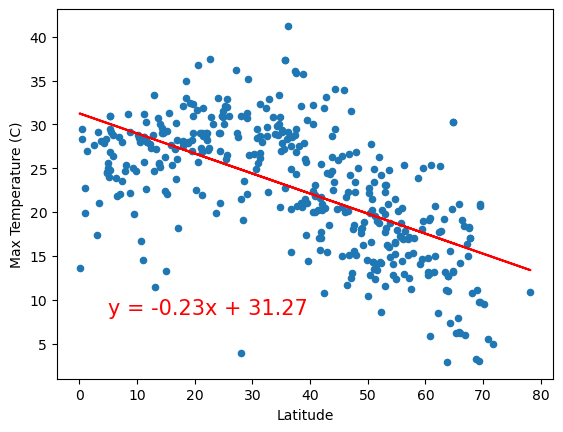

The r-value is: 0.8376
y = 0.42x + 27.20


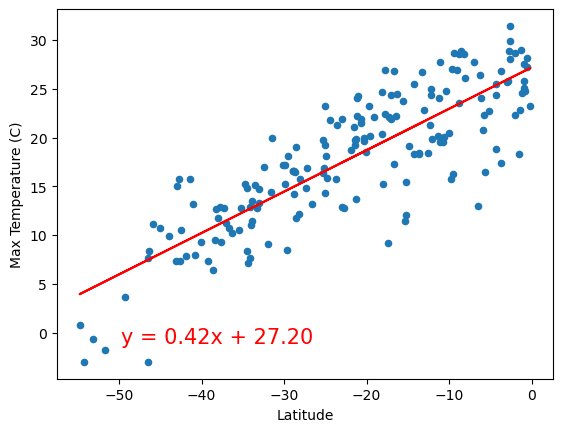

In [19]:
y_params = ['Humidity (%)', 'Cloudiness (%)', 'Wind Speed (m/s)']

y_param = 'Max Temperature (C)'
figname = f"Latitude_vs_Temp_North"
linear_regression(northern_hemi_df, y_param, figname, True)

figname = f"Latitude_vs_Temp_South"
linear_regression(southern_hemi_df, y_param, figname, True)

### Humidity vs. Latitude Linear Regression Plot
**Conclusion**: from the two charts below, we see that only a weak correlation exists between latitude and humidity levels. While it seems like there is a small tendency for the humidity to increase closer to the equator, the model is too weak to draw any real conclusion. The results are inconclusive for both hemispheres.

The r-value is: 0.0246
y = 0.03x + 69.85


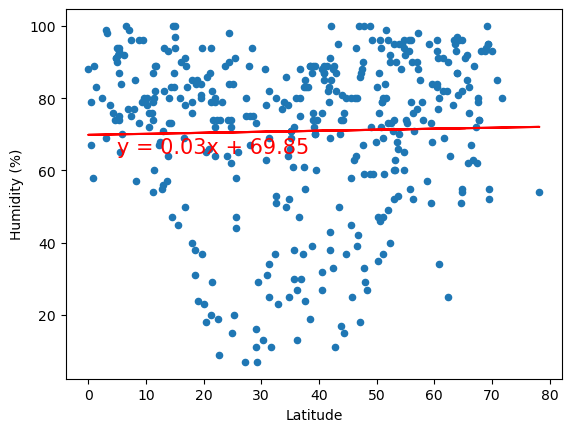

The r-value is: 0.1019
y = 0.12x + 76.39


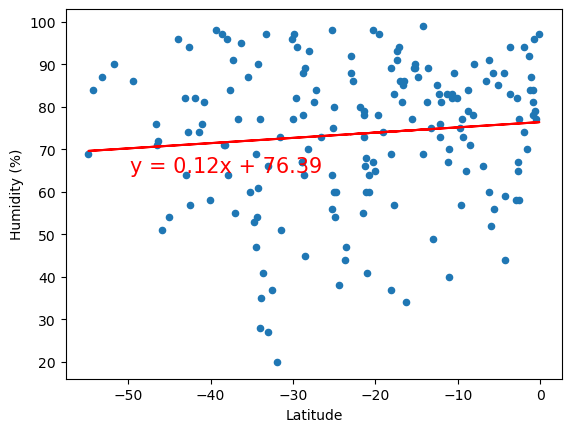

In [20]:
y_param = 'Humidity (%)'
figname = f"Latitude_vs_Humidity_North"
linear_regression(northern_hemi_df, y_param, figname, True)

figname = f"Latitude_vs_Humidity_South"
linear_regression(southern_hemi_df, y_param, figname, True)

### Cloudiness vs. Latitude Linear Regression Plot
**Conclusion**: from the chart below, we see only a weak correlation between latitude and cloud coverage. The data are all over the place and other factors, such as humidity level, temperature, or time of the day, could probably help improve the model. The results are inconclusive for both hemispheres.

The r-value is: -0.1182
y = -0.25x + 66.73


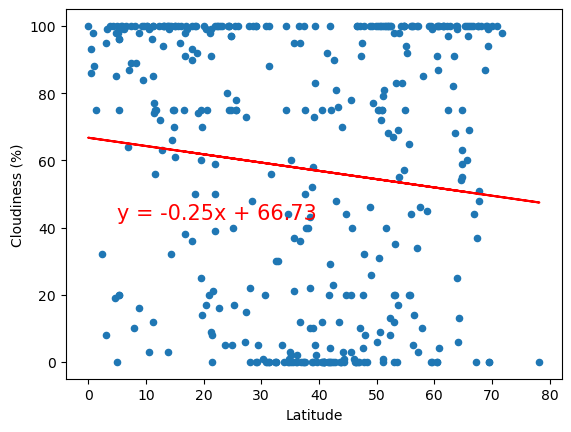

The r-value is: -0.1521
y = -0.43x + 44.58


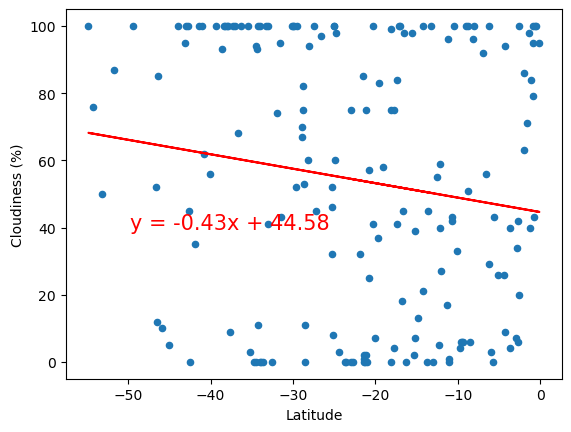

In [21]:
y_param = 'Cloudiness (%)'
figname = f"Latitude_vs_Cloud_North"
linear_regression(northern_hemi_df, y_param, figname, True)

figname = f"Latitude_vs_Cloud_South"
linear_regression(southern_hemi_df, y_param, figname, True)

### Wind Speed vs. Latitude Linear Regression Plot
**Conclusion**: from the charts below, we see only a weak correlation between latitude and windspeed. In the Northern Hemipshere, there is a small tendency for the wind speed to increase as we get closer to the equator. This could be explained by the higher linear speed of the earth at the equator compared to other points on the plane. For instance, a point on the polar circle will be closer to the axis of rotation and therefore experience the same rotational speed but a slower linear speed. The shape of the Earth and its rotation are however not the only factor as the maximum windspeed are reached around latitude 15-25 deg and high wind speeds are also observed around 45 deg N. In the Southern Hemisphere, the model is even weaker and no tangible conclusions can be drawn.

The r-value is: -0.0938
y = -0.01x + 3.69


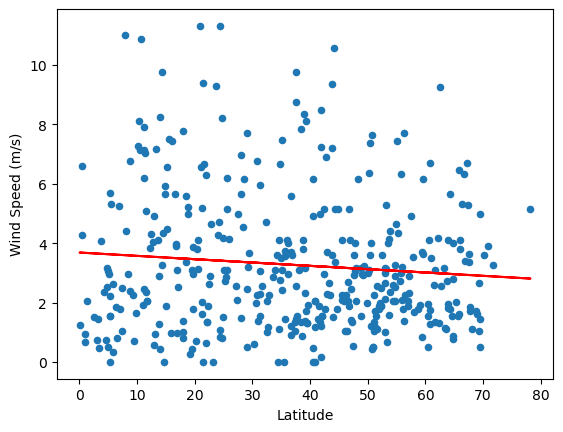

The r-value is: -0.0185
y = -0.00x + 3.79


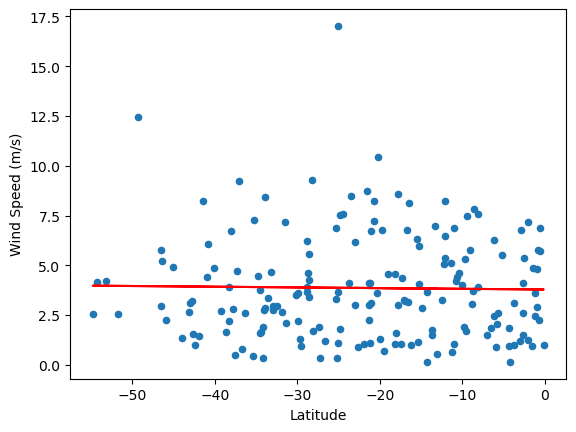

In [23]:
y_param = 'Wind Speed (m/s)'
figname = f"Latitude_vs_Wind_North"
linear_regression(northern_hemi_df, y_param, figname, True)

figname = f"Latitude_vs_Wind_South"
linear_regression(southern_hemi_df, y_param, figname, True)